***
*Course:* [Math 535](https://people.math.wisc.edu/~roch/mmids/) - Mathematical Methods in Data Science (MMiDS)  
*Author:* [Sebastien Roch](https://people.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
*Updated:* September 7, 2022   
*Copyright:* &copy; 2022 Sebastien Roch
***
Modified by Hanbaek Lyu 2023


# Chapter 1 - Introduction and review

This chapter has two main goals: 
1. To introduce a first data science problem. 
2. To review basic facts about Euclidean geometry, vector calculus, and probability.
3. To highlight some surprising phenomena in high-dimensional space. 

## 1.1 A first data science example: species delimitation 

Imagine that you are an evolutionary biologist studying irises and that you have collected measurements on a large number of iris samples. Your goal is to identify different [species](https://en.wikipedia.org/wiki/Species) within this collection.

![Iris measurements](https://www.w3resource.com/w3r_images/iris_flower_sepal_and_petal.png)

([Source](https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php))

Here is a [classical iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) first analyzed by the statistician [Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). We will upload the data in the form of a data table (similar to a spreadsheet) called [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) in [`pandas`](https://pandas.pydata.org/docs/), where the columns are different measurements (or features) and the rows are different samples. Below, we load the data using [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#) and show the first $5$ lines of the dataset (see [`DataFrame.head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)).

In [11]:
# IF RUNNING ON GOOGLE COLAB
# When prompted, upload: 
#     * iris-measurements.csv 
# from your local file system
# Dataset available at: https://people.math.wisc.edu/~roch/mmids/notes.html
# Alternative instructions: https://colab.research.google.com/notebooks/io.ipynb

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

In [2]:
# Python 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
#df = pd.read_csv('iris-measurements.csv')
#df.head()

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

There are $150$ samples (as can be seen by using [`DataFrame.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) which gives the dimensions of the DataFrame as a tuple).

In [5]:
df.shape[0]

150

Here is a summary of the data (see [`DataFrame.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)).

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Let's first extract the columns into a Numpy array using [`DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html), and visualize the petal data. Below, each point is a sample. This is called a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). 

In [8]:
X = df[['petal length (cm)', 'petal width (cm)', 
        'sepal length (cm)', 'sepal width (cm)']].to_numpy()

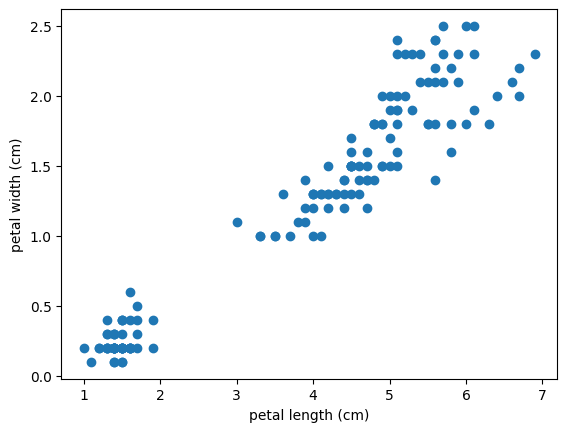

In [9]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

We observe a clear cluster of samples on the bottom left. What is a [cluster](https://en.wikipedia.org/wiki/Cluster_analysis)? Intuitively, it is a group of samples that are close to each other, but far from every other sample. In this case, it may be an indication that these samples come from a separate species. 

Now let's look at the full dataset. Visualizing the full $4$-dimensional data is not straightforward. One way to do this is to consider all pairwise scatter plots.

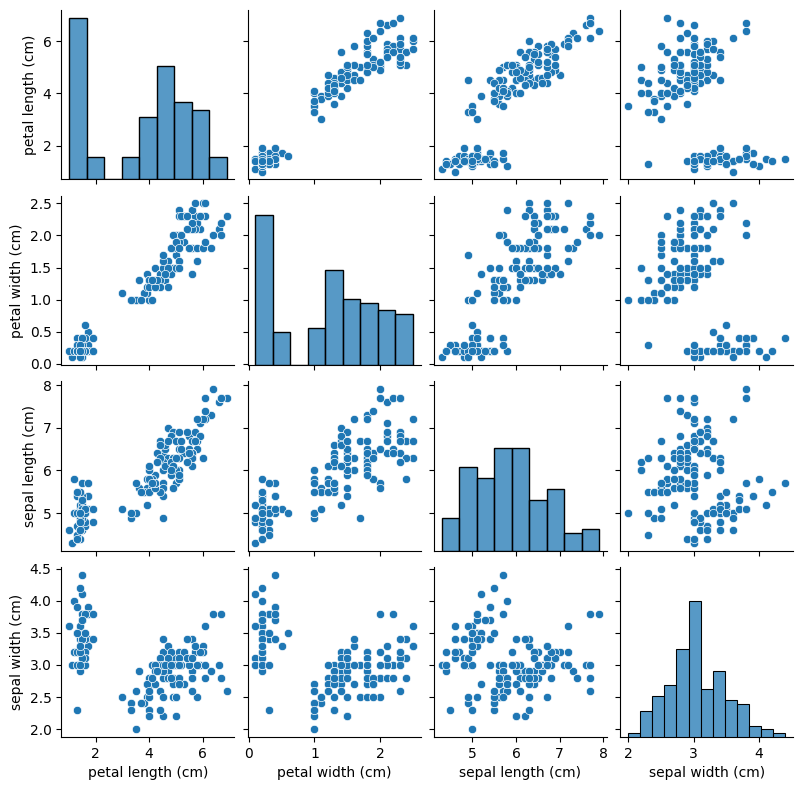

In [10]:
sns.pairplot(df, vars=['petal length (cm)', 'petal width (cm)', 
        'sepal length (cm)', 'sepal width (cm)'], height=2)
plt.show()

What would be useful is a method that *automatically* identifies clusters *whatever the dimension of the data*. In this chapter, we will discuss a standard way to do this: $k$-means clustering. We will come back to the iris dataset later in the chapter. 

But first we need to review some basic concepts about vectors and distances in order to formulate clustering as an appropriate *optimization* problem, a perspective that will be recurring throughout.